In [ ]:
## Normality Testing
## QQ Plot in Python (test for Normality)
import pandas as pd
data=pd.read_csv('/content/Normality Testing Data.csv')

In [ ]:
data.head()

,id,csi,billamt
0,1,38.35,34.85
1,2,47.02,10.99
2,3,36.96,24.73
3,4,43.07,7.90
4,5,38.77,9.38


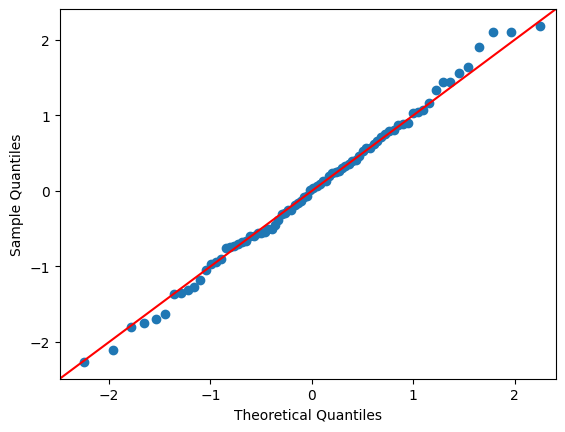

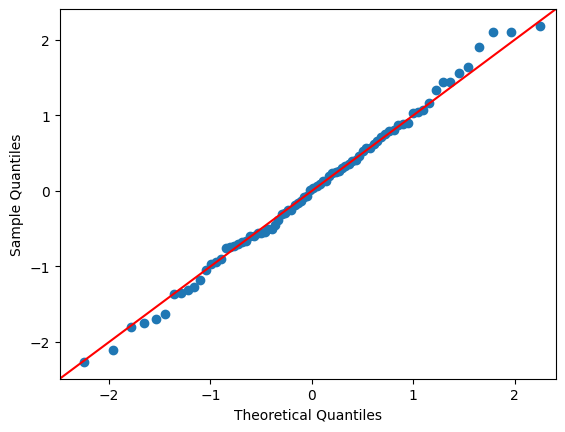

In [ ]:
import statsmodels.api as sm
sm.graphics.qqplot(data.csi, line='45', fit=True)

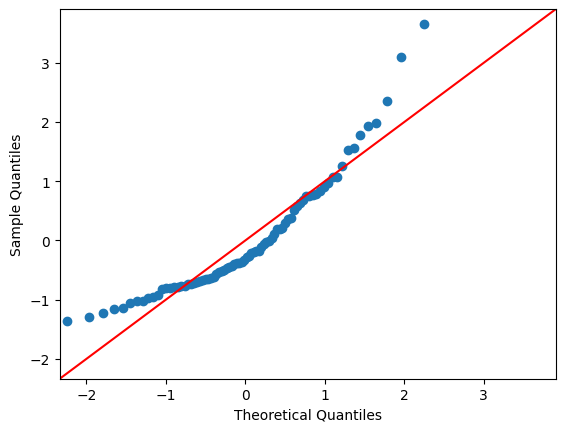

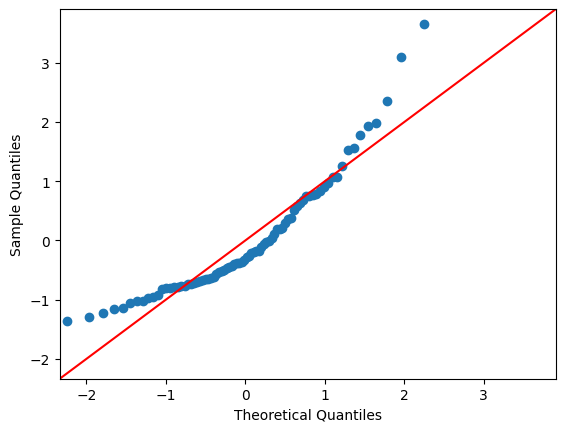

In [ ]:
sm.graphics.qqplot(data.billamt, line='45', fit=True)

In [ ]:
## Shapiro Wilk Test
## Null Hypothesis (H0):  Sample is drawn from Normal Population
## Alternate Hypothesis (H1): Sample is drawn from Non-Normal Population

import scipy as sp
sp.stats.shapiro(data.csi)

ShapiroResult(statistic=0.9919633269309998, pvalue=0.9037835597991943)

In [ ]:
## p-value is 0.903 >0.05, accept null hypotheses

In [ ]:
sp.stats.shapiro(data.billamt)

ShapiroResult(statistic=0.890307605266571, pvalue=4.858379270444857e-06)

In [ ]:
## p-value is <0.05, reject H0, billamt is not coming from normally distributed population

In [ ]:
## Kolmogorov-Smirnov test
sm.stats.diagnostic.lilliefors(data.csi)

(0.04238708824708459, 0.9859314950919987)

In [ ]:
## kstest_normal() from statsmodels

In [ ]:
sm.stats.diagnostic.lilliefors(data.billamt)

(0.1424429511673755, 0.0009999999999998899)

In [ ]:
## PARAMETRIC TESTS
## One sample t-test
# Null Hypothesis (H0): μ = 90 
# Alternate Hypothesis (H1): μ > 90


In [ ]:
data2=pd.read_csv('/content/ONE SAMPLE t TEST.csv')

In [ ]:
data2.head()

,Time
0,85
1,95
2,105
3,85
4,90


In [ ]:
from scipy.stats import ttest_1samp
ttest_1samp(data2.Time, popmean=90,alternative='greater')

TtestResult(statistic=1.9176218472595046, pvalue=0.04074043079962237, df=11)

In [ ]:
## p-value <0.05, reject H0, average time taken to complete the mis report is >90

In [ ]:
## Independent sample t-test  
# Null Hypothesis (H0): μ1 = μ2
# Alternate Hypothesis (H1): μ1 ≠ μ2
data=pd.read_csv('/content/INDEPENDENT SAMPLES t TEST.csv') 

In [ ]:
data.head()

,time_g1,time_g2
0,85.0,83
1,95.0,85
2,105.0,96
3,85.0,94
4,90.0,102


In [ ]:
from scipy import stats
stats.ttest_ind(data['time_g1'],data['time_g2'],nan_policy="omit", 
  equal_var=True)


Ttest_indResult(statistic=0.22345590920212569, pvalue=0.8250717960964379)

In [ ]:
## p-value >0.05, accept H0, mean time for group 1=group2

In [ ]:
# Independent samples t-test when variances are not equal, Welch's t test 
stats.ttest_ind(data['time_g1'],data['time_g2'], equal_var=False, nan_policy='omit')


Ttest_indResult(statistic=0.21965992515741178, pvalue=0.8282468548302411)

In [ ]:
## Paired sample t-test
#  Null Hypothesis (H0): There is no difference in average time before and after the training. i.e. D=0
# Alternate Hypothesis (H1):Average time is less after the training (Training is effective.) D>0
data=pd.read_csv('/content/PAIRED t TEST.csv')
data.head()



,time_before,time_after
0,85,74
1,95,91
2,92,80
3,102,91
4,95,88


In [ ]:
stats.ttest_rel(data['time_before'],data['time_after'] ,alternative='greater')

TtestResult(statistic=8.22948711672449, pvalue=4.918935850301797e-07, df=14)

In [ ]:
## p-value <0.05, reject H0, time taken after training is < time taken before training
## training is effective

In [ ]:
## Correlation t-test
# Null Hypothesis (H0): There is no correlation between Job proficiency and Aptitude test 
# Alternate Hypothesis (H1):There is correlation between Job proficiency and Aptitude test
data=pd.read_csv('/content/Correlation test.csv')
data.head()


,Empcode,aptitude,job_prof
0,E101,86,88
1,E102,62,80
2,E103,110,96
3,E104,101,76
4,E105,100,80


In [ ]:
stats.pearsonr(data['aptitude'], data['job_prof'])

PearsonRResult(statistic=0.5144106946654771, pvalue=0.008517216152487185)

In [ ]:
## p-value<0.05, reject H0, there is a correlation between aptitude and job_prof

In [ ]:
## F-test for equality of variances
# Null Hypothesis (H0):  Variances of time are equal in two groups, σ12  =  σ22.
# Alternate Hypothesis (H1): Alternative Hypothesis H1:  σ12 ≠  σ22
data = pd.read_csv('/content/INDEPENDENT SAMPLES t TEST.csv')


In [ ]:
data.head()

,time_g1,time_g2
0,85.0,83
1,95.0,85
2,105.0,96
3,85.0,94
4,90.0,102


In [ ]:
import numpy as np
from scipy import stats

x = np.array(data.dropna()['time_g1'])
y = np.array(data['time_g2'])

f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
dfn = x.size-1 #define degrees of freedom numerator 
dfd = y.size-1 #define degrees of freedom denominator 
p = 2*(1-stats.f.cdf(f, dfn, dfd)) #find p-value of F test statistic 
print(f, p)

1.5434275971616587 0.4523632544892888


In [ ]:
## p-value 0.45>0.05, accept H0, varainces in the two groups is equal

In [ ]:
import pandas as pd
import numpy as np
## Non-parametric statistical test
# Mann-Whitney test
# Null Hypothesis (H0):  The two samples come from the same population
# Alternate Hypothesis (H1): The two samples do not come from the same population
data = pd.read_csv('/content/Mann Whitney test.csv')

In [ ]:
data

,aptscore,Group
0,11.5,G1
1,23.6,G1
2,12.1,G1
3,14.5,G1
4,16.1,G1
5,19.8,G1
6,11.0,G2
7,25.0,G2
8,26.3,G2
9,12.2,G2


In [ ]:
from scipy.stats import mannwhitneyu

# similar to aptscore ~ Group in R
# create objects with aptscore for G1 & G2 separately 
group1 = data[data['Group'] == 'G1']['aptscore']
group2 = data[data['Group'] == 'G2']['aptscore']
mannwhitneyu(group1, group2, alternative="two-sided")

MannwhitneyuResult(statistic=18.0, pvalue=0.7307692307692307)

In [ ]:
## p-value 0.73 >0.05, accept H0, both group G1 and G2 are coming from the same population

In [ ]:
# Wilcoxon Signed Rank Test for paired data
#  Null Hypothesis (H0): The median of the difference in the population is zero
# Alternate Hypothesis (H1): The median of the difference in the population is less than zero.
data = pd.read_csv('/content/Wilcoxon Signed Rank test for paired data.csv')


In [ ]:
data.head()

,Before,After
0,58,74
1,52,65
2,61,60
3,48,45
4,50,58


In [ ]:
from scipy.stats import wilcoxon
wilcoxon(data['Before'], data['After'], alternative = "less")

WilcoxonResult(statistic=4.0, pvalue=0.001708984375)

In [ ]:
## p-value 0.001 <0.05, reject H0, Time taken before is less than time taken after

In [ ]:
## Kruskal Wallis test (similar to ANOVA test in Parametric)
# Null Hypothesis (H0):  The two samples come from the same population
# Alternate Hypothesis (H1): The two samples do not come from the same population
data = pd.read_csv('/content/Kruskal Wallis Test.csv')


In [ ]:
data

,aptscore,Group
0,11.5,GroupI
1,12.1,GroupI
2,14.5,GroupI
3,16.1,GroupI
4,19.8,GroupI
5,23.6,GroupI
6,11.0,GroupII
7,12.2,GroupII
8,15.0,GroupII
9,15.7,GroupII


In [ ]:
from scipy.stats import kruskal

group1 = data[data['Group'] == 'GroupI']['aptscore']
group2 = data[data['Group'] == 'GroupII']['aptscore']
group3 = data[data['Group'] == 'GroupIII']["aptscore"]

kruskal(group1, group2, group3)

KruskalResult(statistic=2.230929090974231, pvalue=0.3277629827136111)

In [ ]:
## p-value 0.3277 >0.05, accept H0, Group 1, 2 and 3 come from the same population

In [ ]:
## Chi-square test of Association
# Null Hypothesis (H0):  performance and source are not associated
# Alternate Hypothesis (H1): performance and source are associated
data = pd.read_csv('/content/chi square test of association.csv')




In [ ]:
data.head()

,sn,performance,source
0,1,Excellent,Internal
1,2,Excellent,Internal
2,3,Excellent,Internal
3,4,Excellent,Internal
4,5,Excellent,Internal


In [ ]:
cont_table = pd.crosstab(data.performance, data.source)

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(cont_table)

Chi2ContingencyResult(statistic=107.37856396477088, pvalue=2.6359873347121296e-22, dof=4, expected_freq=array([[110.        ,  83.33333333,  96.66666667],
       [113.79310345,  86.20689655, 100.        ],
       [106.20689655,  80.45977011,  93.33333333]]))

In [ ]:
## p-value <0.05, reject H0, performance and source are associated

In [ ]:
## One Way ANOVA
# Null Hypothesis (H0): Mean satisfaction index for 3 departments are equal  i.e. µ1= µ2= µ3
# Alternate Hypothesis (H1): Mean satisfaction index for 3 departments are not equal 
data = pd.read_csv('/content/Two way anova.csv')

In [ ]:
data.head()

,satindex,dept,exp
0,75,FINANCE,lt5
1,56,FINANCE,lt5
2,72,FINANCE,lt5
3,59,FINANCE,lt5
4,62,FINANCE,lt5


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('satindex ~ C(dept)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(dept),164.222222,2.0,1.730956,0.19281
Residual,1565.416667,33.0,NaN,NaN


In [ ]:
## p-value 0.19281 >0.05, accept H0, mean satisfaction index for all the three departments is the same

In [ ]:
## Two Way ANOVA
# (H01): Average satisfaction index is equal for 3  departments

# (H02): Average satisfaction index is equal for 2 experience levels

# (H03) Interaction effect(dept*exp) is not significant on satisfaction index
data = pd.read_csv('Two Way Anova.csv')



In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('satindex ~ C(dept) + C(exp) + C(dept) : C(exp)', data=data).fit()
anova_model=sm.stats.anova_lm(model, typ=2)
anova_model

,sum_sq,df,F,PR(>F)
C(dept),164.222222,2.0,1.678973,0.203624
C(exp),78.027778,1.0,1.595479,0.216274
C(dept):C(exp),20.222222,2.0,0.206748,0.814374
Residual,1467.166667,30.0,NaN,NaN


In [ ]:
## all the three p-values >0.05, accept H0